# Credit Card Fraud Detection

In [13]:
import pandas as pd
import numpy as np
%config IPCompleter.greedy=True #autocomplete jupyter

In [14]:
file_path = "creditcard.csv"
data = pd.read_csv(file_path)

In [15]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
data.Amount.head(n=5)

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [17]:
len(data.Class[data.Class==1])

492

In [18]:
#index_drop = data.Class[data.Class==0].index[:(492-482)]

In [19]:
len(data.Class[data.Class==0])

284315

In [20]:
index_drop = data.Class[data.Class==0].index[:(284315-20000)]

In [21]:
data.drop(index_drop,axis=0,inplace=True)

## Train Test Split

In [22]:
x = data.drop('Class',axis=1)

y = data.Class

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

#random_forest = RandomForestClassifier(n_estimators=100,max_depth = 5 , min_samples_split = 0.1 , min_samples_leaf = 0.05 , max_features = 0.05)
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest = random_forest.fit(x_train, y_train)

y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)


print("train F1_Score - " + str(f1_score(y_train, y_pred_train)))

print("test F1_Score - " + str(f1_score(y_test, y_pred_test)))

train F1_Score - 1.0
test F1_Score - 0.9891304347826086


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[4006,    1],
       [   1,   91]], dtype=int64)

In [45]:

print(confusion_matrix(y_test, y_pred_test))
print("\n")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("True Negative = " + str(tn))
print("False Positive = " + str(fp))
print("False Negative = " + str(fn))
print("True Positive = " + str(tp))
print("\n")

[[4006    1]
 [   1   91]]


True Negative = 4006
False Positive = 1
False Negative = 1
True Positive = 91




# SVM

In [46]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

classifier = classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)


print("train F1_Score - " + str(f1_score(y_train, y_pred_train)))

print("test F1_Score - " + str(f1_score(y_test, y_pred_test)))

train F1_Score - 0.9737704918032787
test F1_Score - 0.9666666666666666


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
print("\n")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("True Negative = " + str(tn))
print("False Positive = " + str(fp))
print("False Negative = " + str(fn))
print("True Positive = " + str(tp))
print("\n")



[[4006    1]
 [   5   87]]


True Negative = 4006
False Positive = 1
False Negative = 5
True Positive = 87




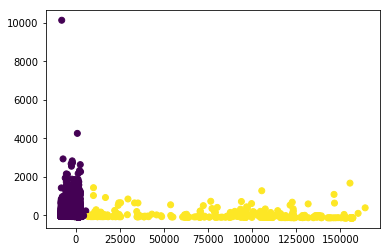

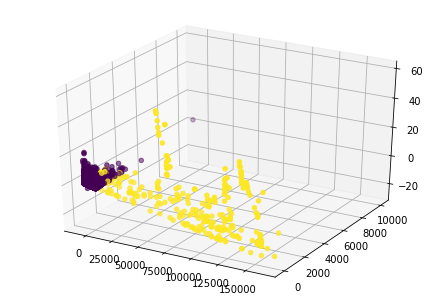

In [48]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)  
x_pca = pca.transform(x_train)

#2D plot
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred_train)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x_train)

#https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
#3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_train)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred_train)
plt.show()

## DBSCAN

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=100000, min_samples=2).fit(x)#, min_samples=2
y_pred = dbscan.labels_


cluster_center = dbscan.components_
cluster_center.shape

print("F1_Score - " + str(f1_score(y, y_pred,average="weighted")))

F1_Score - 0.9641318092363403


C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))


tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print("True Negative = " + str(tn))
print("False Positive = " + str(fp))
print("False Negative = " + str(fn))
print("True Positive = " + str(tp))
print("\n")

[[20000     0]
 [  492     0]]
True Negative = 20000
False Positive = 0
False Negative = 492
True Positive = 0




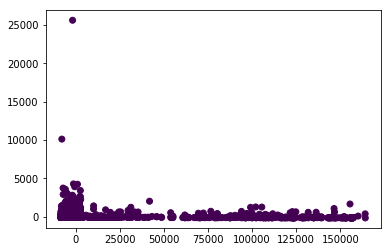

"\npca = PCA(n_components=3)\npca.fit(x)  \nx_pca = pca.transform(x)\n\npca_cluster_center = PCA(n_components=3)\npca_cluster_center.fit(cluster_center)  \npca_cluster_center = pca_cluster_center.transform(cluster_center)\n\n#3D plot\nfig = plt.figure()\nax = Axes3D(fig)\nax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred,s = size_y)\n#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)\n#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)\nplt.show()\n"

In [51]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50



#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred+50)#,s = size_y,alpha=0.1)
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 10,alpha=0.5, linewidth=100)
plt.show()

'''
pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred,s = size_y)
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()
'''

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))
print("\n")

tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print("True Negative = " + str(tn))
print("False Positive = " + str(fp))
print("False Negative = " + str(fn))
print("True Positive = " + str(tp))
print("\n")

[[20000     0]
 [  492     0]]


True Negative = 20000
False Positive = 0
False Negative = 492
True Positive = 0


